In [1]:
import pandas as pd
import numpy as np

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

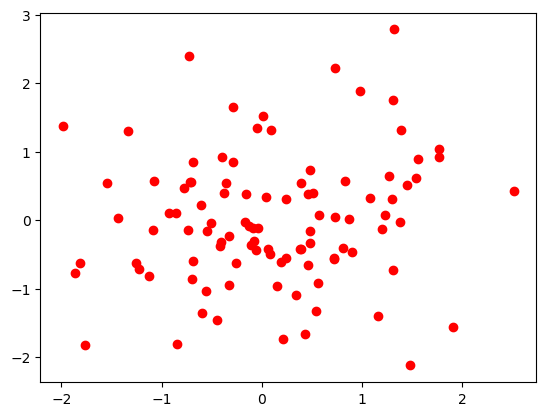

In [3]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro')



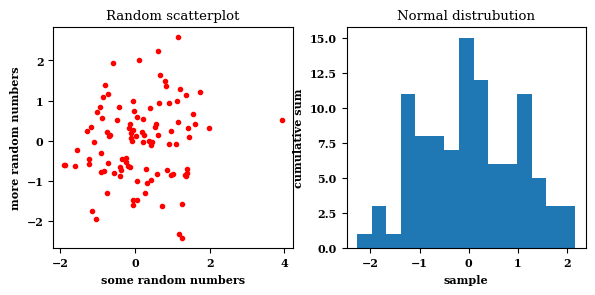

In [6]:
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=150)

<Axes: >

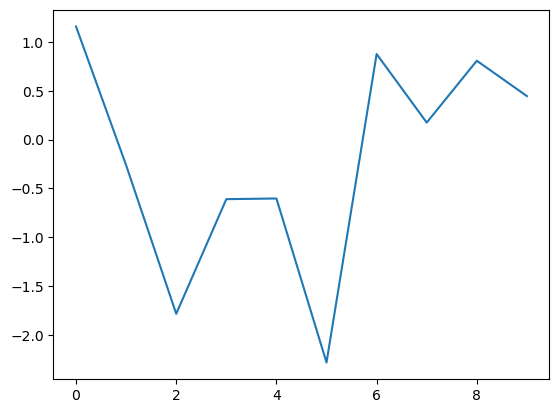

In [7]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

<Axes: >

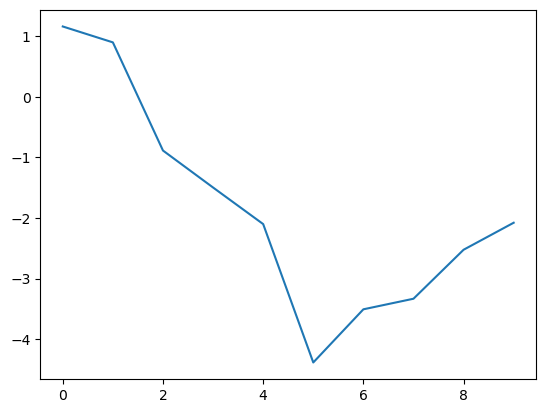

In [8]:
normals.cumsum().plot(grid=False)


<Axes: >

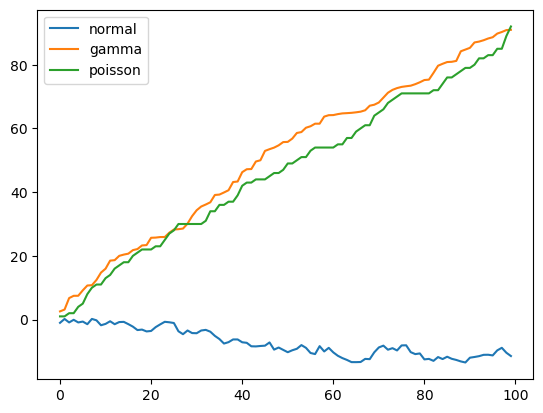

In [9]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

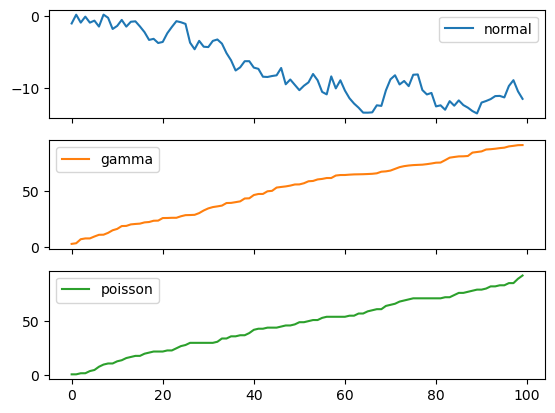

In [10]:
variables.cumsum(0).plot(subplots=True)


<Axes: >

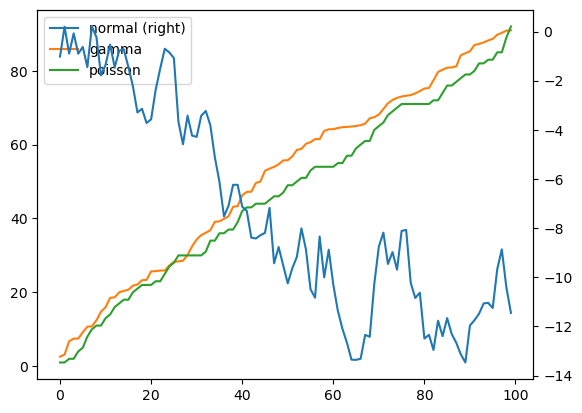

In [11]:
variables.cumsum(0).plot(secondary_y='normal')


Text(0, 0.5, 'cumulative sum')

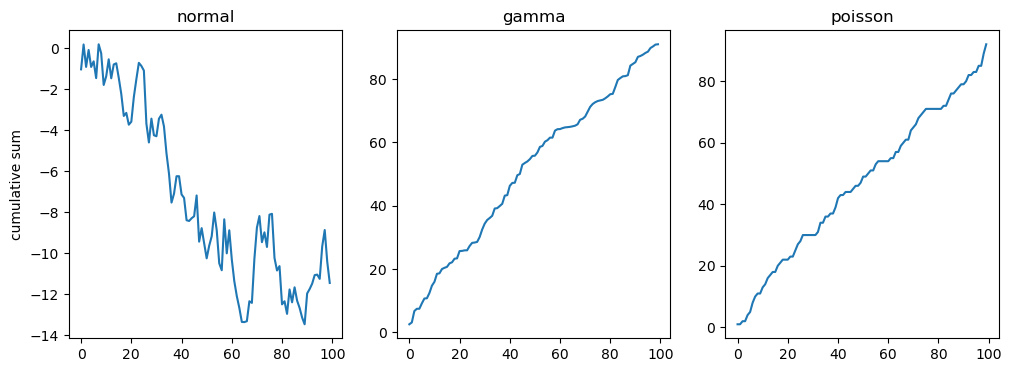

In [12]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

In [19]:
titanic = pd.read_excel("/Users/girishthakur/Downloads/titanic3.xls", "titanic3")
titanic.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

<Axes: xlabel='pclass'>

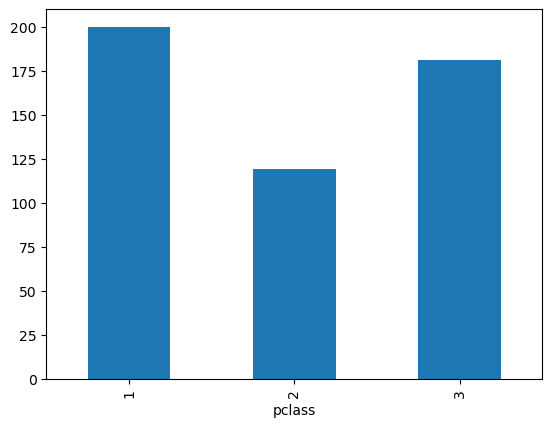

In [20]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')


<Axes: ylabel='sex,pclass'>

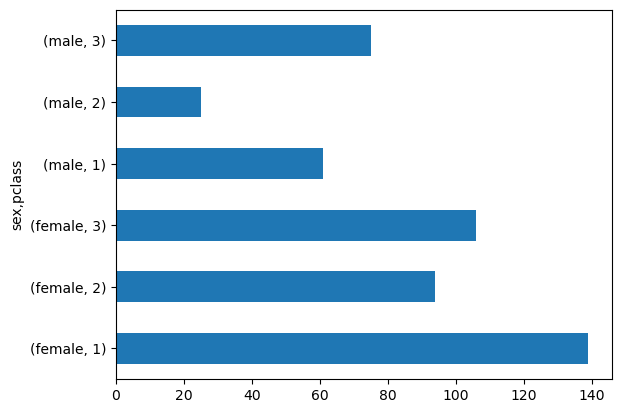

In [21]:
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh')


<Axes: xlabel='pclass,sex'>

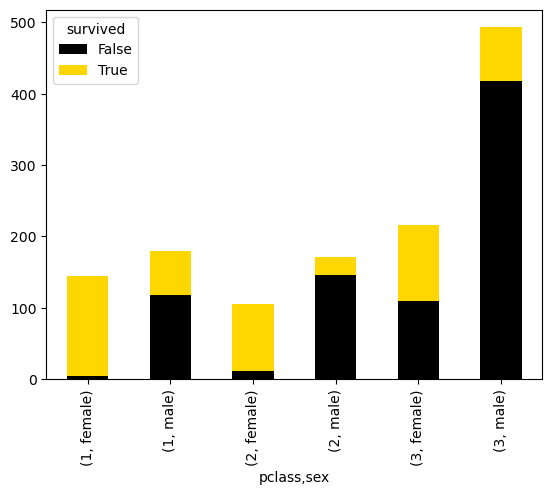

In [22]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)


<Axes: ylabel='pclass,sex'>

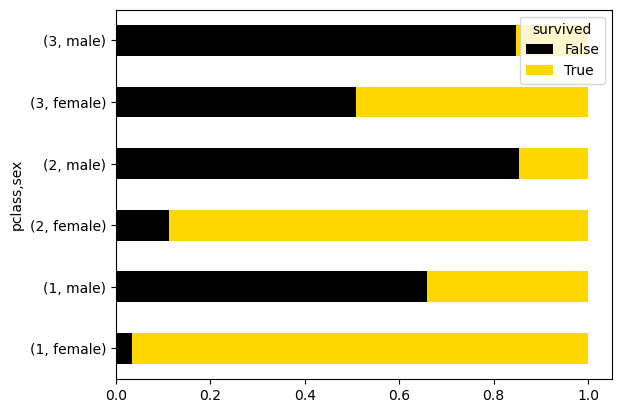

In [23]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])


<Axes: >

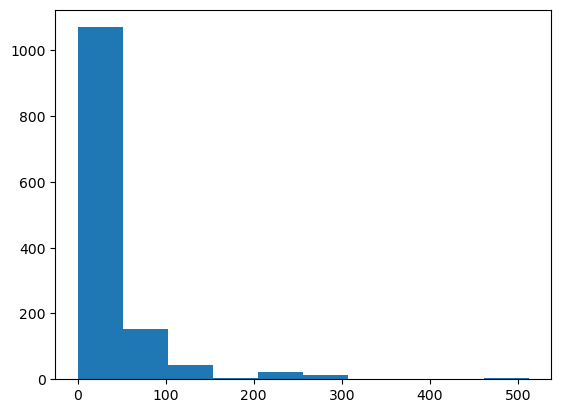

In [24]:
titanic.fare.hist(grid=False)


<Axes: >

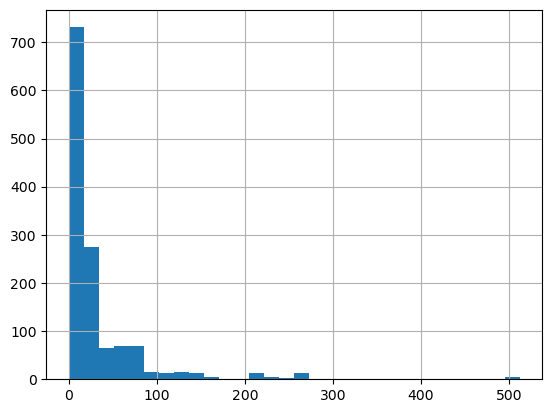

In [25]:
titanic.fare.hist(bins=30)


In [30]:
from math import log2
from math import sqrt
sturges = lambda n: int(log2(n) + 1)
square_root = lambda n: int(sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + log(len(data)) + log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

<Axes: >

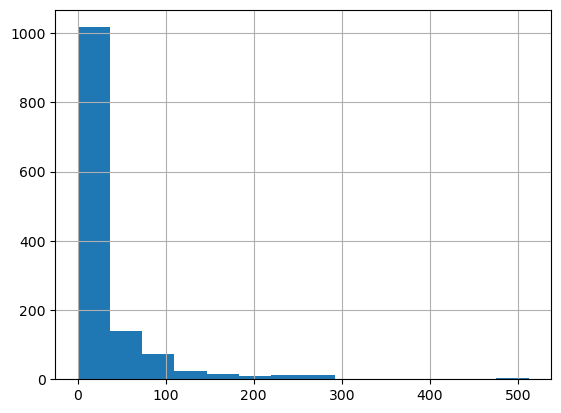

In [31]:
from math import log
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))


<Axes: ylabel='Density'>

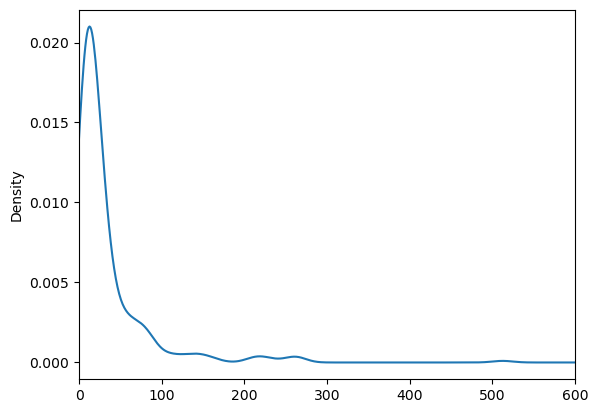

In [32]:
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))


<Axes: ylabel='Density'>

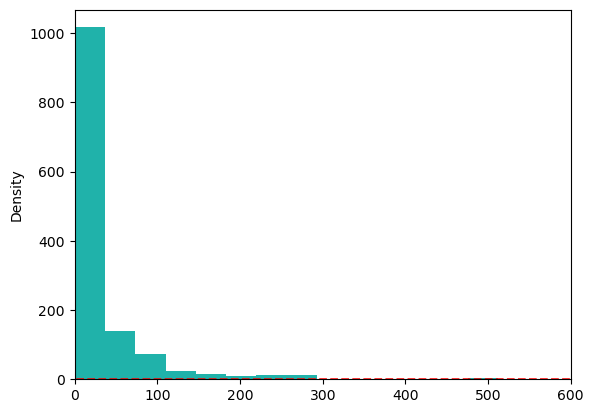

In [39]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')


<Axes: title={'center': 'fare'}, xlabel='pclass'>

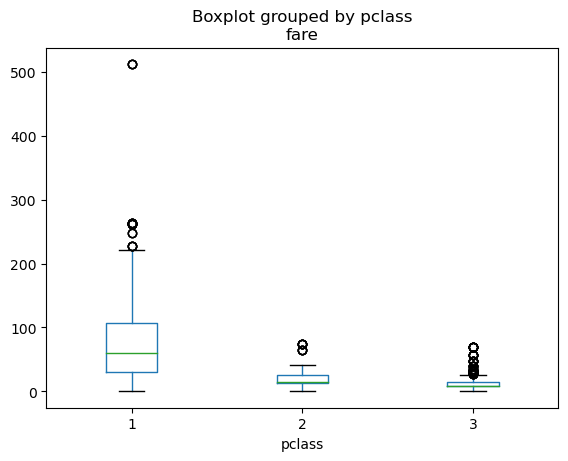

In [40]:
titanic.boxplot(column='fare', by='pclass', grid=False)


TypeError: 'module' object is not callable

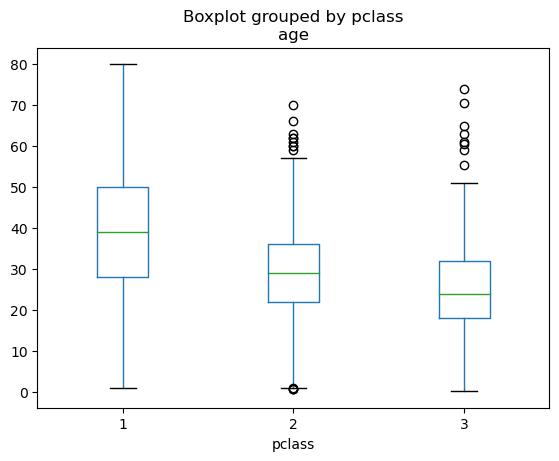

In [53]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plot(x, y, 'r.', alpha=0.2)


<Axes: xlabel='pclass'>

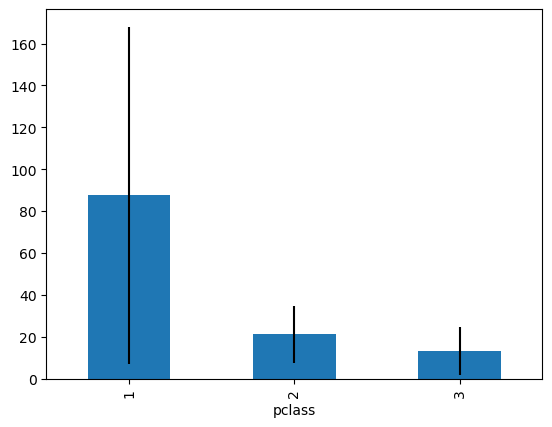

In [54]:
titanic.groupby('pclass')['fare'].mean().plot(kind='bar', yerr=titanic.groupby('pclass')['fare'].std())


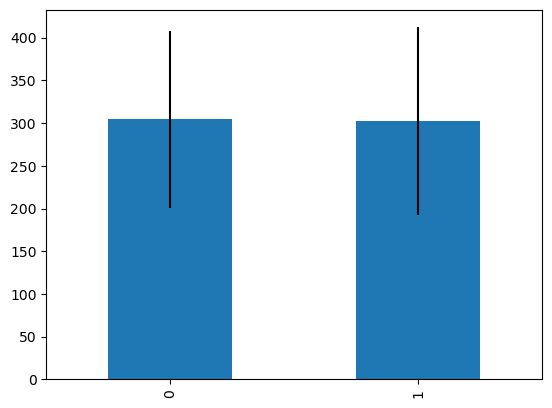

In [55]:
data1 = [150, 155, 175, 200, 245, 255, 395, 300, 305, 320, 375, 400, 420, 430, 440]
data2 = [225, 380]

fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)

TypeError: 'module' object is not callable

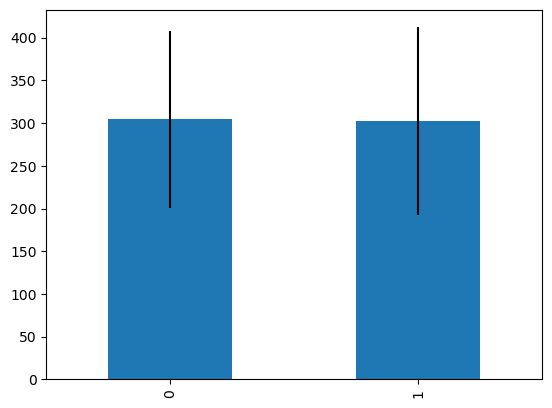

In [60]:
import matplotlib.pyplot as plot
fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)
x1, x2 = p.xaxis.get_majorticklocs()
plt(np.random.normal(x1, 0.01, size=len(data1)), data1, 'ro')
plt([x2]*len(data2), data2, 'ro')

In [61]:
baseball = pd.read_csv("/Users/girishthakur/Downloads/baseball.csv")
baseball.head()


    playerID  yearID  gameNum        gameID teamID lgID   GP  startingPos
0  gomezle01    1933        0  ALS193307060    NYA   AL  1.0          1.0
1  ferreri01    1933        0  ALS193307060    BOS   AL  1.0          2.0
2  gehrilo01    1933        0  ALS193307060    NYA   AL  1.0          3.0
3  gehrich01    1933        0  ALS193307060    DET   AL  1.0          4.0
4  dykesji01    1933        0  ALS193307060    CHA   AL  1.0          5.0

In [68]:
from pandas.tools.plotting import autocorrelation_plot

titanic = titanic[titanic.age.notnull() & titanic.fare.notnull()]

tp = RPlot(titanic, x='age')
tp.add(TrellisGrid(['pclass', 'sex']))
tp.add(GeomDensity())
_ = tp.render(gcf())

ModuleNotFoundError: No module named 'pandas.tools'